<a href="https://colab.research.google.com/github/plugyawn/cerebruh/blob/main/BlackScholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANNEXURE

**Overview of the Simulation Code**

**Simulating the Black Scholes Equation for the Football Transfer Market**

This Colab uses numpy, scipy, and more to simulate the BlackScholes equation.

**Below is the code for scraping transfermarkt.co.in for data about over 250 football players and their transfer windows. It utilizes the BeautifulSoup library and the Selenium library to access dynamic webpages and scrape data.**

We did not run this on Google Colab because Selenium utlizes a webdriver application which is much simpler to implement on an offline terminal than in Colab. 

In [ ]:

# from bs4 import *
# from requests import *
# import time
# from selenium import webdriver
# from selenium.webdriver.edge.options import Options 
# import csv
# browser = webdriver.Edge('C:\\Program Files (x86)\\Microsoft\\Edge\\Application\\msedgedriver.exe')
# rowData = []
# columnData = []
# for k in range(20):
#     url = "https://www.transfermarkt.co.in/transfers/saisontransfers/statistik?page="+str(k)


            
#     browser.get(url)
#     time.sleep(3)
#     html = browser.page_source
#     soup = BeautifulSoup(html, "lxml")
    
#     table = soup.find("table", attrs={"class": "items"})
#     table_data = table.find_all("tr")
#     # print(table_data)
#     for j in range(0, 250):
#         rowData = []
#         try:
#             for i in (table_data[j].find_all("td")):
#                 rowData.append(i.text.replace('\n',''))
#             if(rowData[0].isdigit()):
#                 columnData.append(rowData)
#         except:
#             pass

# for i in columnData:
#     print(i)
# with open('Example2.csv', 'w', encoding="utf-8", newline = '') as csvfile:
#     my_writer = csv.writer(csvfile, delimiter = ',')
#     my_writer.writerows(columnData)
# browser.close()
# browser.quit()

# LIBRARIES USED

**numpy**
We used numpy for taking standard deviations, taking means, manipulating data, and much more.

**scipy.stats**
The primary use of scipy was to take the values of the Standard Normal Distribution for the d1, d2 of the Black Scholes Equation, through the CDF function.

**pandas and matplotlip**
We used dataframe from the pandas library to manipulate our data, and matplotlib to plot it on the graph.

In [158]:
import numpy as np
from scipy.stats import norm
from google.colab import files
uploaded = files.upload()

N = norm.cdf


Saving Player Volatility Data - Sheet1.csv to Player Volatility Data - Sheet1 (4).csv


#CALLS AND PUTS

**Function CALL** takes in the Strike price, Spot Price, the Time Period, the Risk-free interest rate, and the Volatility and outputs the Call Price.

**Function PUTS** takes in the Strike price, Spot Price, the Time Period, the Risk-free interest rate, and the Volatility and outputs the Put Price. It calls the CALL function once.

In [157]:

def CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)
def PUTS(S, K, T, r, sigma):
  return K*np.exp(-r*T)-S+CALL(S,K,T,r,sigma)

In [147]:
from google.colab import drive

In [148]:
import matplotlib.pyplot as plt
import io

In [149]:
import pandas as pd


In [150]:
df2 = pd.read_csv(io.BytesIO(uploaded['Player Volatility Data - Sheet1.csv']), index_col = 0)
df2 = df2.drop([1], axis = 0)
df2.columns

Index(['Name ', 'Values', 'SUM', 'No. Of Data Points', 'Mean',
       'Standard Deviation', 'Volatility'],
      dtype='object')

#DATA VIEW
**These are datapoints mined from transfermarkt.co.in, and represent the change in market price of the players.**

In [151]:
df2

,Name,Values,SUM,No. Of Data Points,Mean,Standard Deviation,Volatility
Serial,,,,,,,
2,Cristano Ronaldo,"8.33,8.33,10,8.33,8.33,7.5,6.25,5,5,5,4.17,3.75",79.99000,12.0,6.665833,2.047604,0.307179
3,Phillipe Coutinho,"3.33,3.75,5.42,7.5,8.33,8.33,10,12.5,11.66,8.3...",113.82000,18.0,6.323333,3.124785,0.494167
4,Frenkie De Jong,"0.06249,0.16664,0.29162,0.58324,0.58324,3.33,5...",62.26723,15.0,4.151149,2.975478,0.716784
5,Angel di Maria,"4.17,3.33,3.33,3.33,3.75,3.75,3.33,3.33,2.67,2...",39.66000,13.0,3.050769,0.732603,0.240137
6,Paulo Dybala,".045,0.05,0.065,0.07,0.085,0.1,0.11,0.11,0.1,0...",1.40200,18.0,0.077889,0.019754,0.253618
7,Thomas Muller,"5,4.17,3.75,4.58,5,4.58,4.17,3.33,2.92,2.67,2....",53.13000,15.0,3.542000,0.978265,0.276190
8,Leroy Sane,"2.5,2.92,3.75,6.25,7.5,8.33,8.33,8.33,6.67,5.8...",76.24000,13.0,5.864615,1.993040,0.339842
9,Antoine Griezmann,"6.67,6.67,8.33,8.33,10,12.5,12.5,10.83,10,8,6....",114.67000,14.0,8.190714,2.691769,0.328637
10,Raheem Sterling,"0.045,0.045,0.05,0.08,0.12,0.14,0.16,0.128,0.1...",1.19600,12.0,0.099667,0.038514,0.386429


#CALCULATING VOLATILITY

**The Black-Scholes equation assumes lognormal distribution of the returns.** Considering a, b, c, d... to be the market values of the player across a number of seasons, we take the natural logarithm of the year-on-year returns and prepare the list, log(b - a), log(c - b), log(d - c)... and so on.

**Then we take the Standard Deviation of the the prepared list, which will be the volatility**.

In [ ]:
def Vol(String): #Comma separated string of numbers
    sum = 0
    pre = String[0]
    list = []
  for i in (String.split(",")[1:-1]):
    #print("current value is "+(i)+" and pre is "+str(pre))
    list.append(float(i)/pre)
    pre = float(i)
  ar = np.log(list)
  volatility = np.std(ar)
  return(volatility)


In [153]:
df2["Values"][2].split(",")[-1]
df2["Name "]

Serial
2      Cristano Ronaldo
3     Phillipe Coutinho
4       Frenkie De Jong
5        Angel di Maria
6          Paulo Dybala
7         Thomas Muller
8            Leroy Sane
9     Antoine Griezmann
10      Raheem Sterling
11              Neymar 
12           Marco Reus
Name: Name , dtype: object

#SIMULATION AND GRAPHS

**This is a graph of the Black-Scholes equation with predictions for the proper market values for these players.** We have used the approximation, Volatility,  σ = (Standard Deviation of market value across seasons)·(number of data points)/𝚺(Market Value Across Seasons)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package s

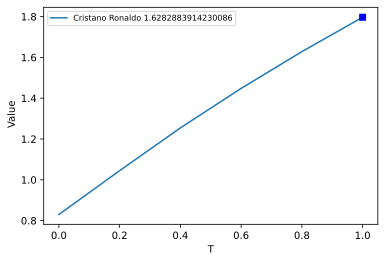

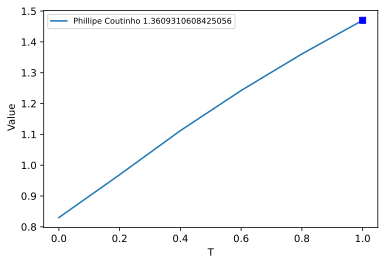

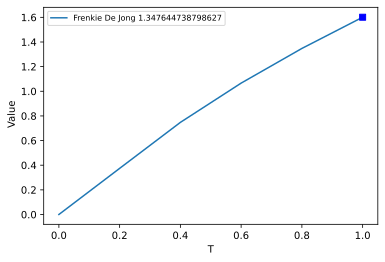

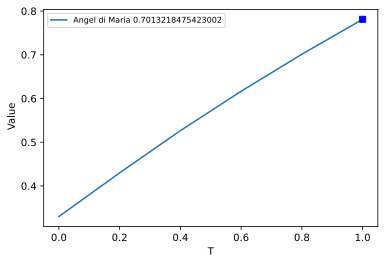

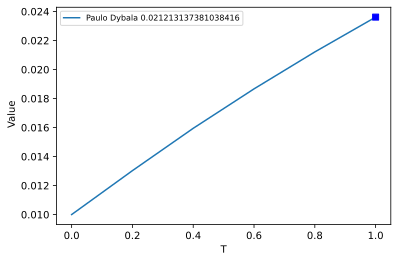

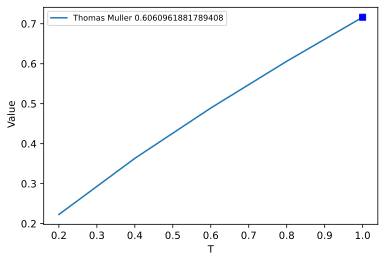

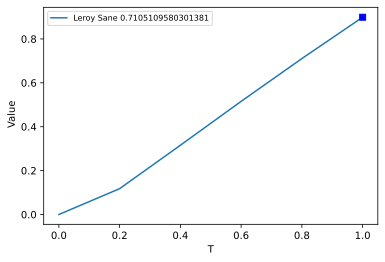

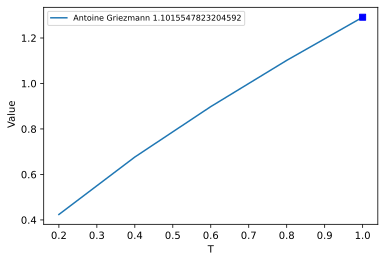

In [260]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
T = np.arange(0, 1.2, 0.2)

for n in [2,3,4,5,6,7,8,9]:
  try:
    K = float(df2["Values"][n].split(",")[-2])
    S = float(df2["Values"][n].split(",")[-3])
    sigma = df2["Volatility"][n]
    calls = [CALL(S, K, t, r, sigma) for t in T]
    df = pd.DataFrame(T,np.array(calls))
    plt.figure()
    plt.plot(T, calls, label=df2["Name "][n]+" "+str(calls[-2]))
    plt.plot(T[-1], calls[-1], 'bs')
    plt.xlabel('T')
    plt.ylabel(' Value')
    plt.legend(loc='upper left', prop={"size":8})
  except:
    continue



#SIMULATION AND GRAPHS, contd.

**Similar code as before, but without the volatility approximation.**

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
T = np.arange(0, 1.2, 0.2)

for n in [2,3,4,5,6,7,8,9]:
  try:
    K = float(df2["Values"][n].split(",")[-2])
    S = float(df2["Values"][n].split(",")[-3])
    sigma = Vol(df2["Values"][n])
    calls = [CALL(S, K, t, r, sigma) for t in T]
    df = pd.DataFrame(T,np.array(calls))
    plt.figure()
    plt.plot(T, calls, label=df2["Name "][n]+" "+str(calls[-2]))
    plt.plot(T[-1], calls[-1], 'bs')
    plt.xlabel('T')
    plt.ylabel(' Value')
    plt.legend(loc='upper left', prop={"size":8})
  except:
    continue
